# 4. 분류

### 분류의 개요

### 결정 트리

결정 트리 모델 시각화

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# data load
iris_data =load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                      test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [ ]:
from sklearn.tree import export_graphviz

# 호출 결과가 tree.dot
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
            feature_names=iris_data.feature_names, impurity=True, filled=True)

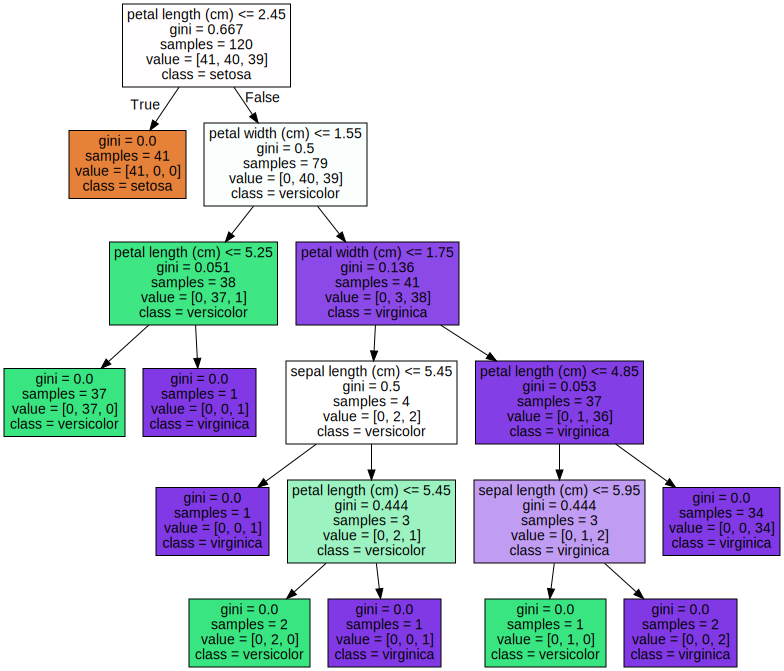

In [ ]:
import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

* feature_importance_ 시각화

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm): 0.025
sepal width (cm): 0.000
petal length (cm): 0.555
petal width (cm): 0.420


<Axes: >

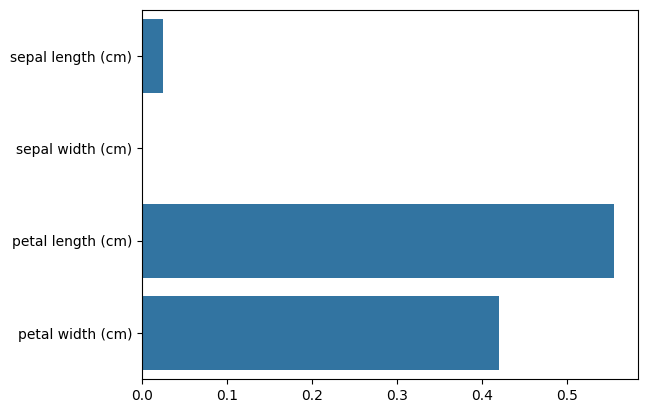

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline
## 노트북을 실행한 브라우저에서 그림 확인 가능

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0}: {1:.3f}'.format(name, value))

# feature importance 컬럼별 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### 결정 트리 과적합

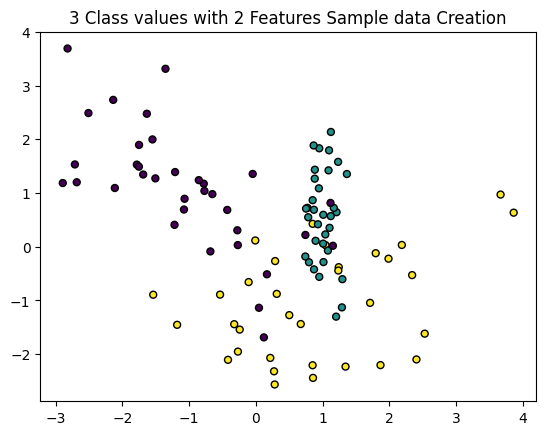

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data Creation')

# 피처 2개, 클래스 3가지 유형 분류 데이터 샘플 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처 2차원 좌표 시각화, 각 클래스는 다른 색으로 표현
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor="k")

In [16]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

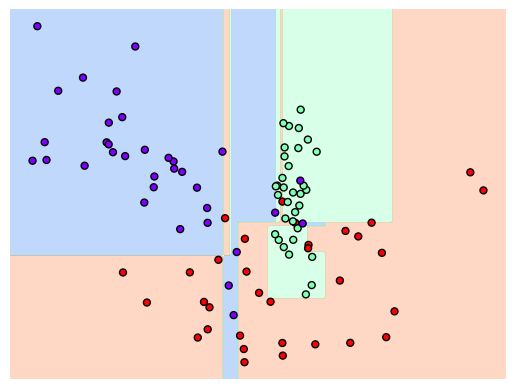

In [17]:
from sklearn.tree import DecisionTreeClassifier

# 결정 트리 학습, 결정 경계 시각화
dt_clf=DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [18]:
# 분할이 자주 일어남 -> 결정 기준 경계가 많아짐 (복잡해짐!)

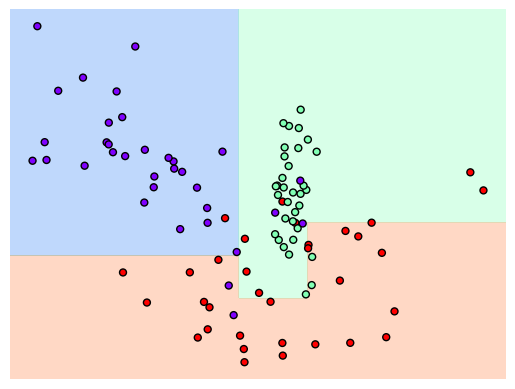

In [19]:
# min_samples_leaf=6으로 노드 생성 규칙 완화

# min_samples_leaf=6으로 트리 생성 조건 제약, 결정 경계 시각화
dt_clf=DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [ ]:
# 학습 데이터에만 과적합된 분류 기준은 예측 성능 떨어뜨릴 수 있음
# => 노드 생성 규칙 완화한 모델의 성능 더 뛰어날 수 있음

### 결정 트리 실습-사용자 행동 인식 dataset

In [20]:
from google.colab import drive
drive.mount('/content/gdrive/')

path = "/content/gdrive/MyDrive/Euron/"

Mounted at /content/gdrive/


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df = pd.read_csv(path+'human_activity/features.txt', sep='\s+',
                          header=None, names=['column_index', 'column_name'])

# 피처명 index 제거, 피처명만 list 객체로 생성
feature_name = feature_name_df.iloc[:,1].values.tolist()
print("전체에서 10개만 추출:", feature_name[:10])

전체에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [23]:
# 중복된 피처명 알아보기
feature_dup_df=feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [24]:
# 42개의 피처명 중복

In [27]:
# 원본 피처명에 _1, _2 추가하기
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df=pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
  feature_dup_df=feature_dup_df.reset_index()
  new_feature_name_df=pd.merge(old_feature_name_df.reset_index(),feature_dup_df,how='outer')
  new_feature_name_df['column_name']=new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x:x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
  new_feature_name_df=new_feature_name_df.drop(['index'],axis=1)
  return new_feature_name_df

In [28]:
import pandas as pd

def get_human_dataset():

  # read_csv에서 공백 문자를 sep로 할당
  feature_name_df=pd.read_csv(path+'human_activity/features.txt',sep='\s+',
                          header=None, names=['column_index', 'column_name'])

  # 중복된 피처명 수정하는 get_new_feature_name_df( ) 이용, 신규 피처명 DataFrame 설정
  new_feature_name_df=get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 list로 변환
  feature_name=new_feature_name_df.iloc[:,1].values.tolist()

  # 학습/테스트 피처 데이터를 DataFrame으로 로딩, 칼럼명은 feature_name 적용
  X_train=pd.read_csv(path+'human_activity/train/X_train.txt',sep='\s+',names=feature_name)
  X_test=pd.read_csv(path+'human_activity/test/X_test.txt',sep='\s+',names=feature_name)

  # 학습/테스트 레이블 데이터를 DataFrame으로 로딩, 칼럼명은 action으로 부여
  y_train=pd.read_csv(path+'human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
  y_test=pd.read_csv(path+'human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])

  # 학습/테스트용 DataFrame 모두 반환
  return X_train,X_test,y_train,y_test

X_train,X_test,y_train,y_test=get_human_dataset()

In [29]:
print('## 학습 피처 데이터셋 info() ##')
print(X_train.info())

## 학습 피처 데이터셋 info() ##
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [30]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred=dt_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0: .4f}'.format(accuracy))

# DecisionTreeClassifier 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미처 :\n', dt_clf.get_params())

결정 트리 예측 정확도:  0.8548
DecisionTreeClassifier 기본 하이퍼 파라미처 :
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


In [41]:
from sklearn.model_selection import GridSearchCV

params={
    'max_depth': [6,8,10,12,16,20,24]
}

grid_cv=GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0: .4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최고 하이퍼 파라미터: ', grid_cv.best_params_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:  0.8513
GridSearchCV 최고 하이퍼 파라미터:  {'max_depth': 16}


In [42]:
# GridSearchCV의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df=pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값, 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [44]:
max_depths=[6,8,10,12,16,20,24]
# max_depth 변화하면서 그때마다 학습/테스트 세트에서 예측 성능 측정
for depth in max_depths:
  dt_clf=DecisionTreeClassifier(max_depth=depth, random_state=156)
  dt_clf.fit(X_train, y_train)
  pred=dt_clf.predict(X_test)
  accuracy=accuracy_score(y_test,pred)
  print('max_depth={0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth=6 정확도: 0.8558
max_depth=8 정확도: 0.8707
max_depth=10 정확도: 0.8673
max_depth=12 정확도: 0.8646
max_depth=16 정확도: 0.8575
max_depth=20 정확도: 0.8548
max_depth=24 정확도: 0.8548


In [38]:
params ={
    'max_depth': [8,12,16,20],
    'min_samples_split': [16,24]
}

grid_cv=GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0: .4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최고 하이퍼 파라미터: ', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치:  0.8549
GridSearchCV 최고 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_split': 16}


In [39]:
best_df_clf=grid_cv.best_estimator_
pred1=best_df_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도 :{0: .4f}'.format(accuracy))


결정 트리 예측 정확도 : 0.8717


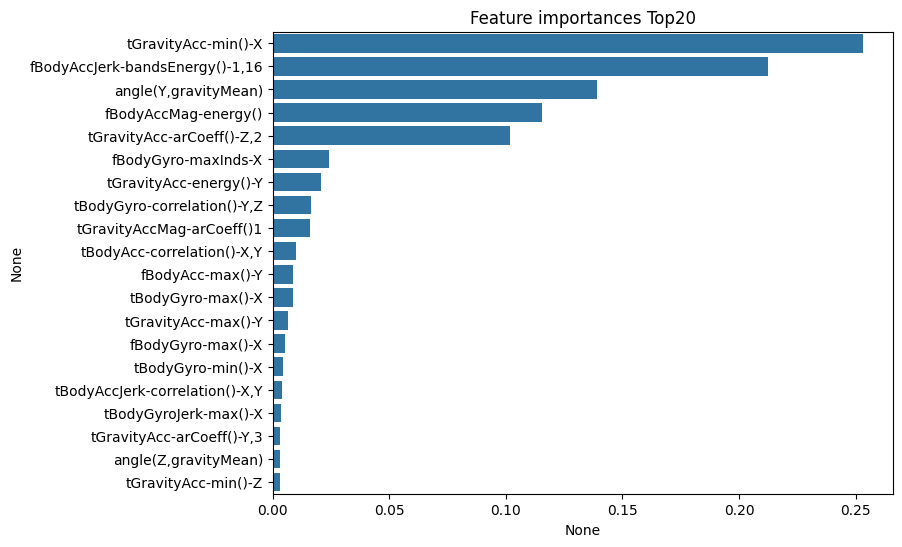

In [40]:
import seaborn as sns

ftr_importances_values=best_df_clf.feature_importances_
ftr_importances=pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### 3. 앙상블 학습

In [46]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer=load_breast_cancer()

data_df=pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [51]:
# 개별 모델은 로지스틱 회귀, KNN
lr_clf=LogisticRegression()
knn_clf=KNeighborsClassifier(n_neighbors=8)

# 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf=VotingClassifier(estimators=[('LR', lr_clf),('KNN', knn_clf)],voting='soft')
X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred=vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0: .4f}'.format(accuracy_score(y_test,pred)))

# 개별 모델의 학습/예측/평가
classifiers=[lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred=classifier.predict(X_test)
  class_name=classifier.__class__.__name__
  print('{0} 정확도: {1: .4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도:  0.9474
LogisticRegression 정확도:  0.9386
KNeighborsClassifier 정확도:  0.9386


### 4. 랜덤 포레스트

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test=get_human_dataset()

# 랜덤 포레스트 학습/평가
rf_clf=RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred=rf_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print('랜덤 포레스트 정확도: {0: .4f}'.format(accuracy))

랜덤 포레스트 정확도:  0.9253


랜덤 포레스트 하이퍼 파라미터 및 튜닝

In [54]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators': [100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
    }

rf_clf=RandomForestClassifier(random_state=0, n_jobs=1)
grid_cv=GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0: .4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도:  0.9180


In [55]:
rf_clf1=RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                               min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred=rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9165


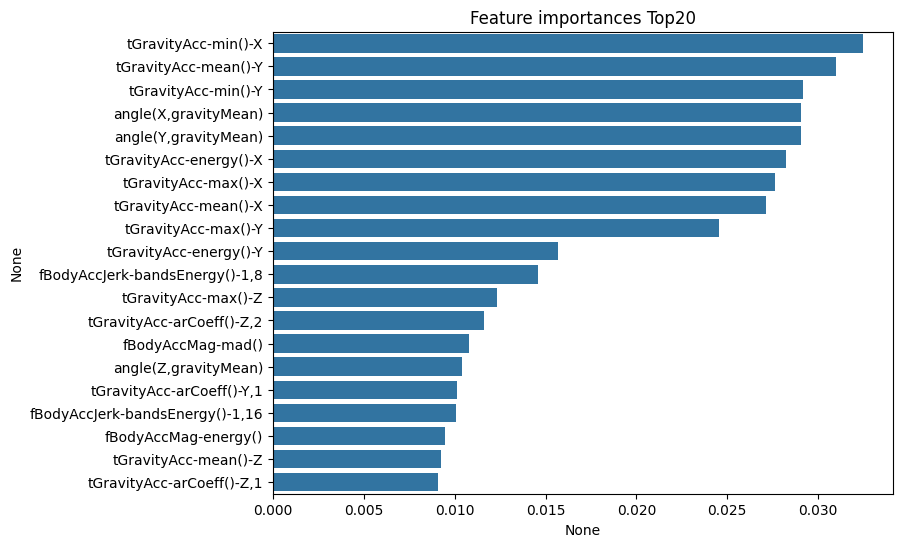

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values=rf_clf1.feature_importances_
ftr_importances=pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()